In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
RANDOM_STATE = 42

In [165]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

In [167]:
df = pd.read_csv(DATASET_PATH)

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

ИССЛЕДОВАНИЕ ДАННЫХ


In [170]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [171]:
df.shape

(129880, 24)

In [175]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [177]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


ЗАМЕНЯЕМ NAN ЗНАЧЕНИЯ НА СРЕДНИЕ

In [180]:
int_float_cols = df.select_dtypes(['int', 'float'])
mean_values = int_float_cols.mean().to_dict() # Составляем словарь со средними значениями по столбцам
df.fillna(mean_values, inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129880 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129880 non-null  float64
 7   Departure Delay in Minutes         129880 non-null  float64
 8   Arrival Delay in Minutes           129880 non-null  float64
 9   Inflight wifi service              129880 non-null  float64
 10  Departure/Arrival time convenient  129880 non-null  float64
 11  Ease of Online booking             1298

In [184]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.647180,3.289865
std,37493.270818,20.340400,4514.556936,93.167737,108.953203,1.359551,1.559029,1.430564,1.312436,1.357387,1.381644,1.349483,1.366618,1.335314,1.361392,1.221592,1.298416,1.218074,1.347434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.000000,45.000000


ИССЛЕДУЕМ ВОЗРАСТ, ОТБРАСЫВАЕМ НЕРЕЛЕВАНТНЫЕ ВЕЛИЧИНЫ

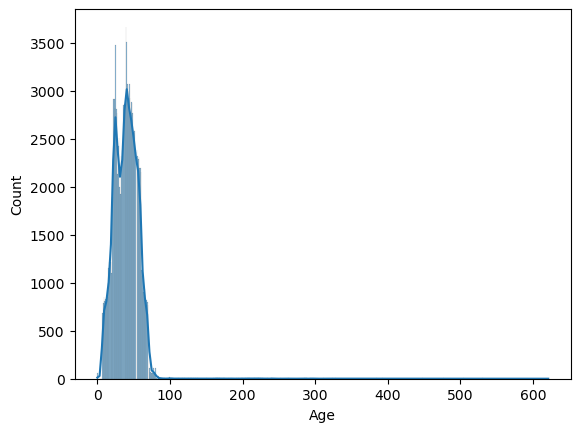

In [187]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [188]:
df = df.drop(df[df['Age'] >80].index)
df = df.drop(df[df['Age'] < 2].index)

ИССЛЕДУЕМ ЦЕЛЕВУЮ ПЕРЕМЕННУЮ

In [190]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58645
satisfied                  44842
-                          25851
Name: count, dtype: int64

In [194]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129007,129264,129237,129222,129338
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65444,105617,89227,61837,58645


In [196]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000,129338.000000
mean,64942.029156,39.430098,1324.191168,15.815482,16.653631,2.732213,3.061877,2.760557,2.981469,3.208415,3.256356,3.445410,3.361430,3.387334,3.356232,3.636097,3.309801,3.647611,3.289750
std,37493.709760,15.097829,4523.551168,93.331549,109.151037,1.359726,1.559396,1.430662,1.312802,1.357435,1.381906,1.349681,1.366654,1.335315,1.361480,1.221642,1.298617,1.217979,1.347543
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32466.250000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64941.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97418.750000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,80.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.000000,45.000000


In [198]:
df = df.drop(df[df['satisfaction'] == '-'].index)

In [200]:
df['Class'] = df['Class'].map({'Business' : 1, 'Eco Plus' : 2,'Eco':3})

In [202]:
mean = df['Class'].mean()
df.fillna(mean, inplace=True)

In [204]:
df['satisfaction'] = df['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103487 non-null  int64  
 1   Gender                             103487 non-null  object 
 2   Age                                103487 non-null  float64
 3   Customer Type                      103487 non-null  object 
 4   Type of Travel                     103487 non-null  object 
 5   Class                              103487 non-null  float64
 6   Flight Distance                    103487 non-null  float64
 7   Departure Delay in Minutes         103487 non-null  float64
 8   Arrival Delay in Minutes           103487 non-null  float64
 9   Inflight wifi service              103487 non-null  float64
 10  Departure/Arrival time convenient  103487 non-null  float64
 11  Ease of Online booking             103487 no

In [208]:
df['satisfaction'].value_counts()

satisfaction
0    58645
1    44842
Name: count, dtype: int64

<Axes: >

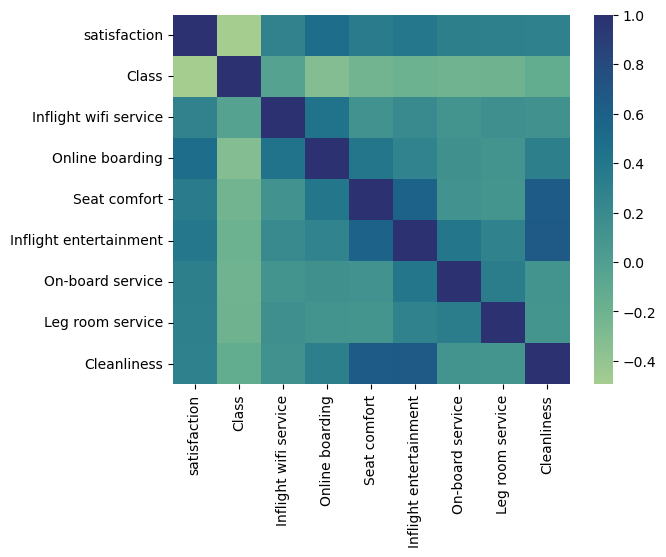

In [212]:
corr = df[['satisfaction', 'Class','Inflight wifi service',
           'Online boarding','Seat comfort','Inflight entertainment',
           'On-board service','Leg room service','Cleanliness']].corr()

sns.heatmap(corr,cmap="crest")
# 0.0-0.2 :'Age','Ease of Online booking','Baggage handling','Checkin service','Inflight service','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient','Gate location'

In [214]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel
count,103487,103487,103487
unique,3,3,3
top,Female,Loyal Customer,Business travel
freq,52372,84548,71285


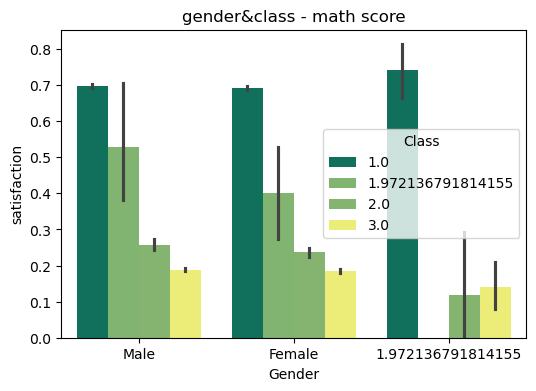

In [216]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='satisfaction', hue='Class', data = df, palette='summer')
plt.title('gender&class - math score')
plt.show()

<Axes: >

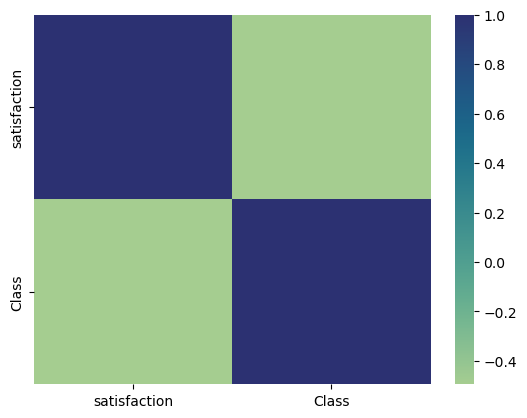

In [217]:
corr = df[['satisfaction', 'Class']].corr()

sns.heatmap(corr, cmap="crest")

In [254]:
X = df.drop(['Gender','Customer Type', 'Type of Travel',
                                             'satisfaction','Flight Distance','Age','Ease of Online booking',
                                             'Baggage handling','Checkin service','Inflight service',
                                             'Departure Delay in Minutes','Arrival Delay in Minutes',
                                             'Departure/Arrival time convenient','Gate location'], axis=1)
y = df['satisfaction']

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((77615, 10), (25872, 10))

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [260]:
pred[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [262]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[12750,  1836],
       [ 2377,  8909]], dtype=int64)

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8371598639455783